Hypotheses:
- Every card has an initial stability.
- When learning a new card, the first grade is determined by the initial stability.
  - For cards with higher stability, the first grade is more likely to be `easy`.
  - For cards with lower stability, the first grade is more likely to be `again`.

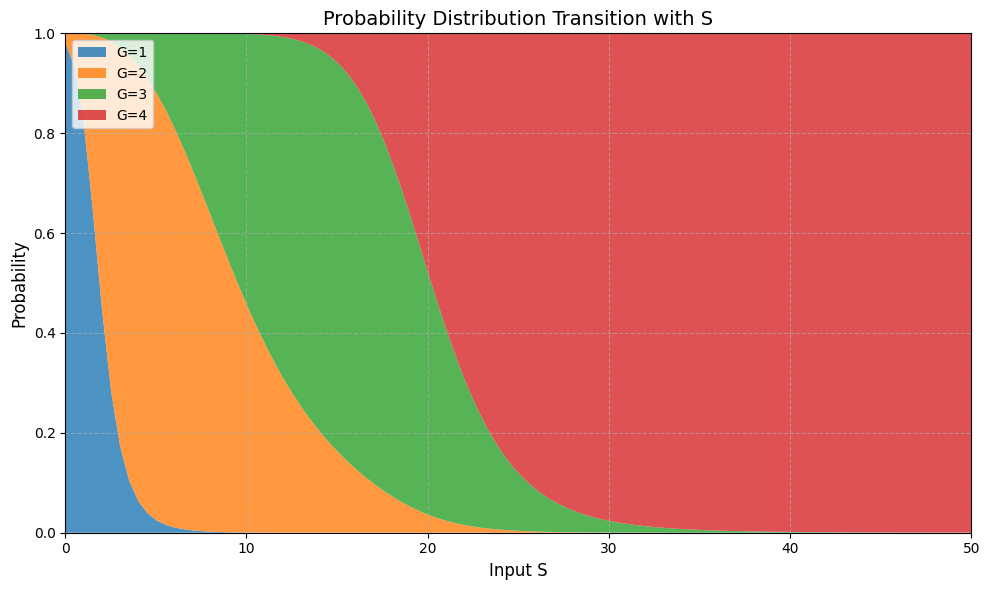

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def compute_grade_probability_by_init_s(S):
    logit_1 = 10 - 5 * np.log(S/2+1)
    logit_2 = 6 + 1 * np.log(S/2+1)
    logit_3 = -1 + 5 * np.log(S/2+1)
    logit_4 = -25 + 15 * np.log(S/2+1)
    
    logits = np.array([logit_1, logit_2, logit_3, logit_4])
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()


S_range = np.linspace(0, 50, 100)
probabilities = np.array([compute_grade_probability_by_init_s(S) for S in S_range])

G1_probs = probabilities[:, 0]
G2_probs = probabilities[:, 1]
G3_probs = probabilities[:, 2]
G4_probs = probabilities[:, 3]

plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = ['G=1', 'G=2', 'G=3', 'G=4']

plt.stackplot(S_range, 
             G1_probs, G2_probs, G3_probs, G4_probs,
             colors=colors,
             labels=labels,
             alpha=0.8)

plt.title('Probability Distribution Transition with S', fontsize=14)
plt.xlabel('Input S', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 50)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

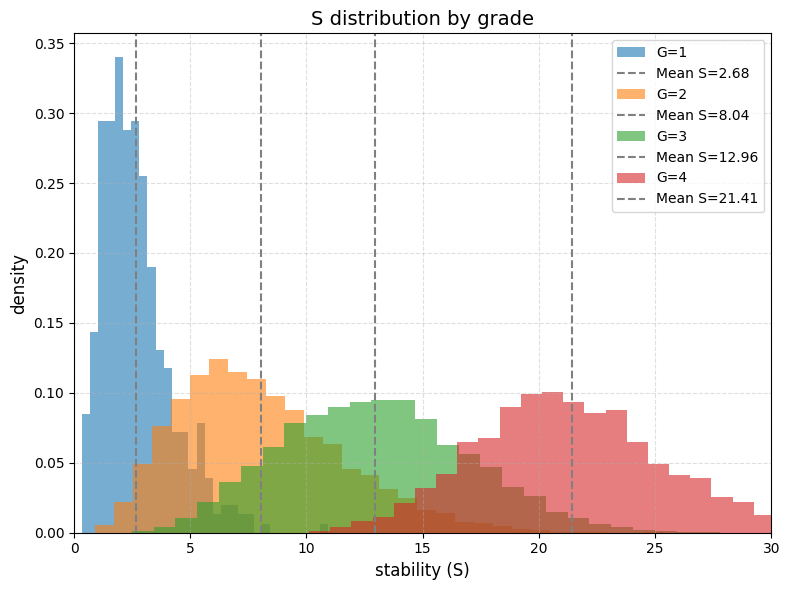

In [2]:
def sample_stabilities(size):
    return np.random.beta(3, 10, size) * 50

s_sample = sample_stabilities(20000)

probabilities = np.array([compute_grade_probability_by_init_s(S) for S in s_sample])

grade_sample = np.array([np.random.choice(range(1, 5), p=P) for P in probabilities])


plt.figure(figsize=(8, 6))

# create a dictionary to store s values by grade
grade_s_dict = {}
for grade in range(1, 5):
    grade_s_dict[grade] = s_sample[grade_sample == grade]

# plot s distribution by grade
for grade, s_values in grade_s_dict.items():
    if len(s_values) > 0:
        mean_s = np.mean(s_values)
        plt.hist(s_values, bins=30, alpha=0.6, label=f'G={grade}', density=True)
        plt.axvline(mean_s, color='gray', linestyle='--', label=f'Mean S={mean_s:.2f}')

plt.title('S distribution by grade', fontsize=14)
plt.xlabel('stability (S)', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.xlim(0, 30)
plt.tight_layout()
plt.show()



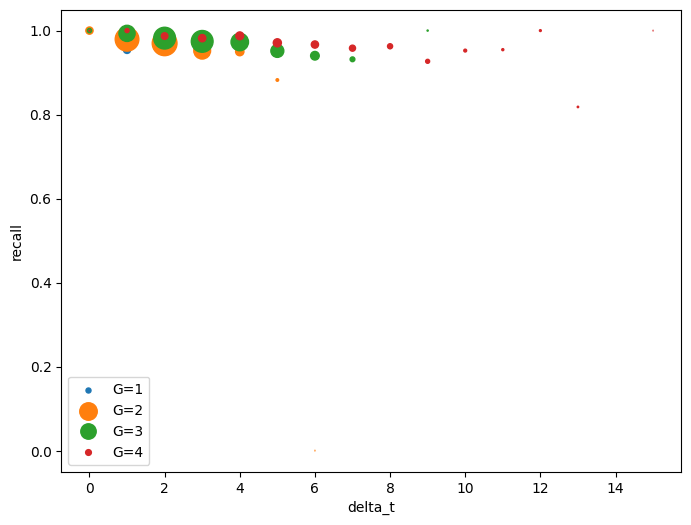

In [3]:
import pandas as pd

def sample_delta_ts(size, mean):
    return (np.random.beta(3, 10, size) * mean).round(0).astype(int)

def exp_forgetting_curve(S, t):
    return np.power(0.9, t/S)


plt.figure(figsize=(8, 6))
for grade, s_values in grade_s_dict.items():
    if len(s_values) > 0:
        delta_ts = sample_delta_ts(len(s_values), np.mean(s_values))
        retrievabilities = exp_forgetting_curve(s_values, delta_ts)
        recalls = [1 if np.random.rand() < r else 0 for r in retrievabilities]
        df = pd.DataFrame({'delta_t': delta_ts, 'recall': recalls})
        # Group by delta_t (rounded to nearest integer) and calculate mean recall and counts
        df['delta_t_rounded'] = df['delta_t'].round().astype(int)
        grouped = df.groupby('delta_t_rounded').agg(
            recall_mean=('recall', 'mean'),
            count=('recall', 'count')
        ).reset_index()
        
        # Use the grouped data for plotting
        plt.scatter(grouped['delta_t_rounded'], grouped['recall_mean'], s=grouped['count']/10, label=f'G={grade}')
plt.xlabel('delta_t')
plt.ylabel('recall')
plt.legend()
plt.show()

Hypotheses:
- When reviewing a card, the probability of getting a certain grade is determined by the retrievability of the card.
  - For `again` grade, the probability is equal to 1 - retrievability.
  - For `hard`, `good`, `easy` grade, the sum of the probabilities is equal to retrievability.
    - When retrievability is high, the probability of `easy` grade is high.
    - When retrievability is low, the probability of `hard` grade is high.

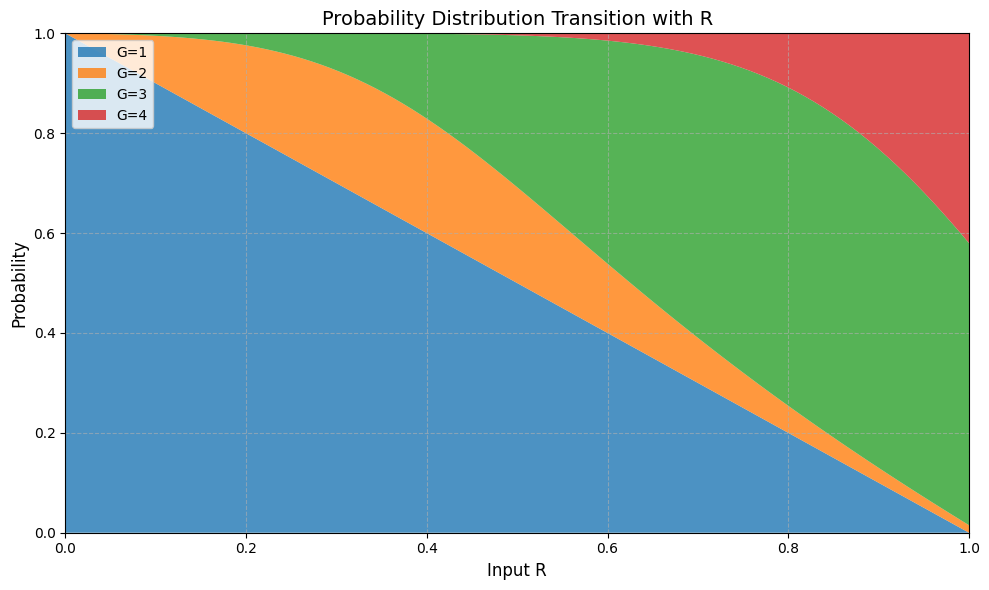

In [4]:
def compute_grade_probability_by_retrievability(r):
    logit_2 = 10 - 5 * np.log(r+1)
    logit_3 = 6 + 6 * np.log(r+1)
    logit_4 = -4 + 20 * np.log(r+1)
    
    logits = np.array([logit_2, logit_3, logit_4])
    exp_logits = np.exp(logits - np.max(logits))
    exp_logits = exp_logits / exp_logits.sum() * r
    return np.concatenate([np.array([1-r]), exp_logits])

def sample_grades(probabilities):
    return np.random.choice(range(1, 5), p=probabilities)

R_range = np.linspace(0, 1, 100)
probabilities = np.array([compute_grade_probability_by_retrievability(R) for R in R_range])

G1_probs = probabilities[:, 0]
G2_probs = probabilities[:, 1]
G3_probs = probabilities[:, 2]
G4_probs = probabilities[:, 3]


plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = ['G=1', 'G=2', 'G=3', 'G=4']

plt.stackplot(R_range, 
             G1_probs, G2_probs, G3_probs, G4_probs,
             colors=colors,
             labels=labels,
             alpha=0.8)

plt.title('Probability Distribution Transition with R', fontsize=14)
plt.xlabel('Input R', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


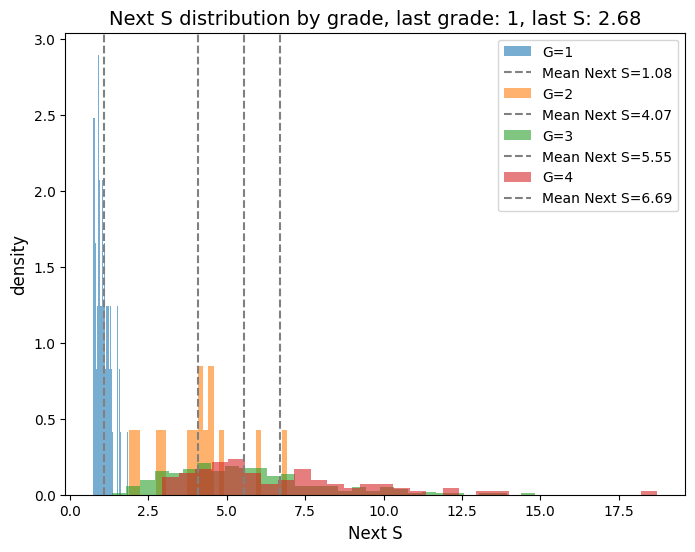

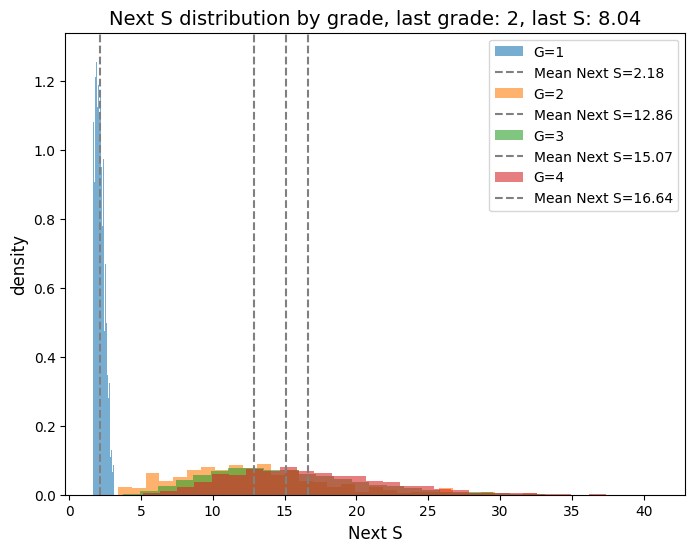

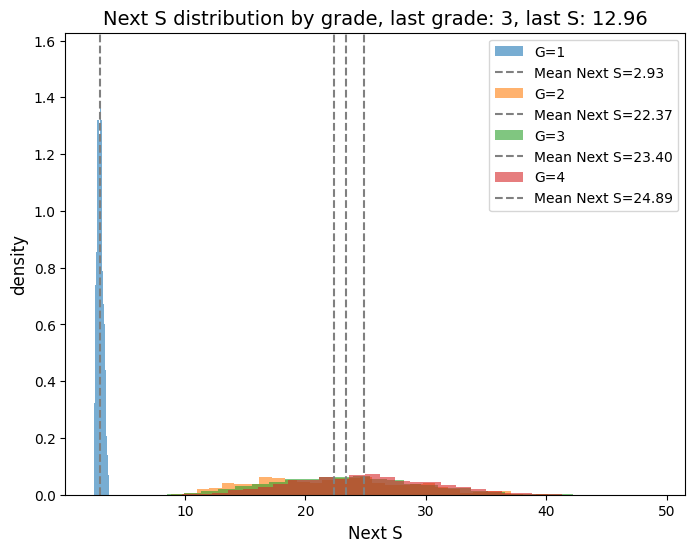

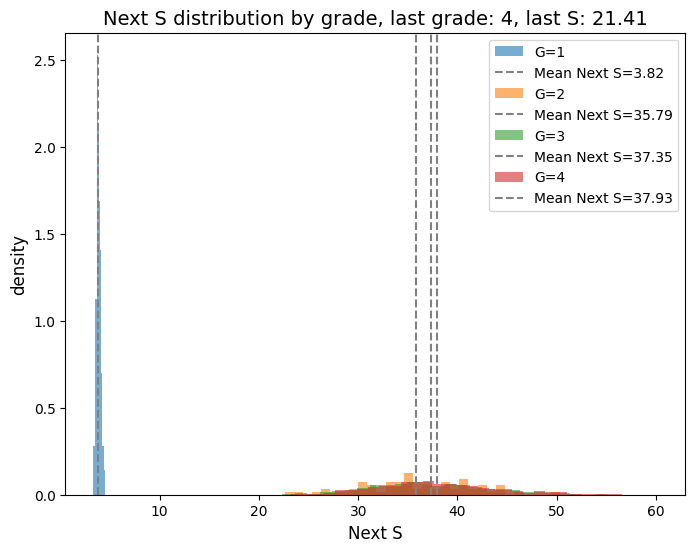

In [5]:
def next_s_after_failure(stability, retrievability):
    return 2 * (np.power(stability + 1, 0.3) - 1) * np.exp(2.3 * (1 - retrievability))

def next_s_after_success(stability, retrievability):
    return stability * (1 + np.exp(1.5) * np.power(stability, -0.1)) * (np.exp(1 * (1 - retrievability) - 1))

def next_stability(stability, retrievability, grade):
    return np.where(grade == 1, next_s_after_failure(stability, retrievability), next_s_after_success(stability, retrievability))


for grade, s_values in grade_s_dict.items():
    if len(s_values) > 0:
        retrievabilities = exp_forgetting_curve(s_values, np.mean(s_values).round(0).astype(int))
        grade_sample = np.array([sample_grades(compute_grade_probability_by_retrievability(r)) for r in retrievabilities])
        next_s_values = next_stability(s_values, retrievabilities, grade_sample)

        plt.figure(figsize=(8, 6))
        plt.title(f'Next S distribution by grade, last grade: {grade}, last S: {np.mean(s_values):.2f}', fontsize=14)
        # create a dictionary to store s values by grade
        grade_next_s_dict = {}
        for grade in range(1, 5):
            grade_next_s_dict[grade] = next_s_values[grade_sample == grade]

        # plot s distribution by grade
        for grade, next_s_values in grade_next_s_dict.items():
            if len(next_s_values) > 0:
                mean_next_s = np.mean(next_s_values)
                plt.hist(next_s_values, bins=30, alpha=0.6, label=f'G={grade}', density=True)
                plt.axvline(mean_next_s, color='gray', linestyle='--', label=f'Mean Next S={mean_next_s:.2f}')

        plt.xlabel('Next S', fontsize=12)
        plt.ylabel('density', fontsize=12)
        plt.legend()
        plt.show()